In [2]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score

# Реализация собственного алгоритма KNN с использованием манхэттенского расстояния
class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Вычисление манхэттенского расстояния между x и всеми точками в X_train
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        # Получение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        # Получение меток классов ближайших соседей
        k_nearest_labels = self.y_train[k_indices]
        # Возврат наиболее частой метки
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# 1. Загрузка данных и выбор начальных условий
# Загрузка датасета California Housing для классификации
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Для задачи классификации разделим целевую переменную на категории
bins = [0, 2, 4, np.inf]
labels = [0, 1, 2]  # 0 - низкая цена, 1 - средняя, 2 - высокая
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['target_class'] = kb.fit_transform(df[['target']]).astype(int)

# Просмотр первых строк
print("Данные:")
print(df.head())

# Разделение данных на признаки и целевые переменные для классификации
X = df.drop(columns=['target', 'target_class'])
y_classification = df['target_class']  # Для классификации

# 2. Создание бейзлайна и оценка качества для классификации
# Разделение на тренировочные и тестовые наборы данных
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Бейзлайн: использование KNeighborsClassifier из sklearn
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train_class)
y_pred_baseline = knn_clf.predict(X_test_scaled)

print("\nБейзлайн Классификация (sklearn KNN):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_baseline))
print(classification_report(y_test_class, y_pred_baseline))

# Обучение собственной модели KNN для классификации
my_knn_clf = MyKNN(k=3)
my_knn_clf.fit(X_train_scaled, y_train_class)
y_pred_class = my_knn_clf.predict(X_test_scaled)

# Оценка качества модели
print("\nКлассификация (MyKNN):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

# Использование другого датасета для задачи регрессии
# Загрузка датасета Diabetes
diabetes = load_diabetes()
df_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_reg['target'] = diabetes.target

# Просмотр первых строк
print("\nДанные для регрессии:")
print(df_reg.head())

# Разделение данных для задачи регрессии
X_reg = df_reg.drop(columns=['target'])
y_regression = df_reg['target']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_regression, test_size=0.3, random_state=42)
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Бейзлайн: использование KNeighborsRegressor из sklearn
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg = knn_reg.predict(X_test_scaled_reg)

print("\nБейзлайн Регрессия (sklearn KNN):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg))

# Обучение собственной модели KNN для регрессии
class MyKNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Вычисление манхэттенского расстояния между x и всеми точками в X_train
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        # Получение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        # Получение значений ближайших соседей
        k_nearest_values = self.y_train[k_indices]
        # Возврат среднего значения
        return np.mean(k_nearest_values)

my_knn_reg = MyKNNRegressor(k=3)
my_knn_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_reg = my_knn_reg.predict(X_test_scaled_reg)

# Оценка качества модели регрессии
print("\nРегрессия (MyKNNRegressor):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R2:", r2_score(y_test_reg, y_pred_reg))

# 3. Улучшение бейзлайна
# Подбор гиперпараметров для классификации
param_grid_clf = {'k': [1, 3, 5, 7, 9]}
best_accuracy = 0
best_k_clf = 3
for k in param_grid_clf['k']:
    my_knn_clf = MyKNN(k=k)
    my_knn_clf.fit(X_train_scaled, y_train_class)
    y_pred_class = my_knn_clf.predict(X_test_scaled)
    acc = accuracy_score(y_test_class, y_pred_class)
    if acc > best_accuracy:
        best_accuracy = acc
        best_k_clf = k

print(f"\nЛучший k для классификации: {best_k_clf}, Accuracy: {best_accuracy}")

# Подбор гиперпараметров для регрессии
param_grid_reg = {'k': [1, 3, 5, 7, 9]}
best_r2 = -1
best_k_reg = 3
for k in param_grid_reg['k']:
    my_knn_reg = MyKNNRegressor(k=k)
    my_knn_reg.fit(X_train_scaled_reg, y_train_reg)
    y_pred_reg = my_knn_reg.predict(X_test_scaled_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    if r2 > best_r2:
        best_r2 = r2
        best_k_reg = k

print(f"\nЛучший k для регрессии: {best_k_reg}, R2: {best_r2}")


Данные:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  target_class  
0    -122.23   4.526             2  
1    -122.22   3.585             2  
2    -122.24   3.521             2  
3    -122.25   3.413             2  
4    -122.25   3.422             2  

Бейзлайн Классификация (sklearn KNN):
Accuracy: 0.729812661498708
Confusion Matrix:
[[2510  470   24]
 [ 603 1544  185]
 [  67  324  465]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      3004
           1       0.66      0.66      0.66      2332
          

2 лаба

In [5]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score

# 1. Загрузка данных и выбор начальных условий
# Загрузка датасета California Housing для классификации
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Для задачи классификации разделим целевую переменную на категории
bins = [0, 2, 4, np.inf]
labels = [0, 1, 2]  # 0 - низкая цена, 1 - средняя, 2 - высокая
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['target_class'] = kb.fit_transform(df[['target']]).astype(int)

# Просмотр первых строк
print("Данные:")
print(df.head())

# Разделение данных на признаки и целевые переменные для классификации
X = df.drop(columns=['target', 'target_class'])
y_classification = df['target_class']  # Для классификации

# 2. Создание бейзлайна и оценка качества для классификации
# Разделение на тренировочные и тестовые наборы данных
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Бейзлайн: использование LogisticRegression из sklearn
log_reg_clf = LogisticRegression(max_iter=500, random_state=42)
log_reg_clf.fit(X_train_scaled, y_train_class)
y_pred_baseline = log_reg_clf.predict(X_test_scaled)

print("\nБейзлайн Классификация (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_baseline))
print(classification_report(y_test_class, y_pred_baseline))

# Реализация собственной логистической регрессии
class MyLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n + 1)  # Включая bias
        X = np.c_[np.ones((self.m, 1)), X]  # Добавление bias
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.theta)
            predictions = self._sigmoid(linear_model)
            gradient = np.dot(X.T, (predictions - y)) / self.m
            self.theta -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        linear_model = np.dot(X, self.theta)
        predictions = self._sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

# Обучение собственной логистической регрессии
my_log_reg_clf = MyLogisticRegression(lr=0.1, n_iter=1000)
y_train_binary = (y_train_class == 1).astype(int)  # Для бинарной классификации (пример)
y_test_binary = (y_test_class == 1).astype(int)
my_log_reg_clf.fit(X_train_scaled, y_train_binary)
y_pred_my_log_reg = my_log_reg_clf.predict(X_test_scaled)

print("\nСамостоятельная Логистическая Регрессия:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_my_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test_binary, y_pred_my_log_reg))

# Использование другого датасета для задачи регрессии
# Загрузка датасета Diabetes
diabetes = load_diabetes()
df_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_reg['target'] = diabetes.target

# Просмотр первых строк
print("\nДанные для регрессии:")
print(df_reg.head())

# Разделение данных для задачи регрессии
X_reg = df_reg.drop(columns=['target'])
y_regression = df_reg['target']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_regression, test_size=0.3, random_state=42)
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Бейзлайн: использование LinearRegression из sklearn
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg = lin_reg.predict(X_test_scaled_reg)

print("\nБейзлайн Регрессия (Linear Regression):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg))

# Реализация собственной линейной регрессии
class MyLinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n + 1)  # Включая bias
        X = np.c_[np.ones((self.m, 1)), X]  # Добавление bias
        for _ in range(self.n_iter):
            predictions = np.dot(X, self.theta)
            errors = predictions - y
            gradient = np.dot(X.T, errors) / self.m
            self.theta -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta)

# Обучение собственной линейной регрессии
my_lin_reg = MyLinearRegression(lr=0.01, n_iter=1000)
my_lin_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_my_lin_reg = my_lin_reg.predict(X_test_scaled_reg)

print("\nСамостоятельная Линейная Регрессия:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_my_lin_reg))
print("R2:", r2_score(y_test_reg, y_pred_my_lin_reg))

# 3. Улучшение бейзлайна для классификации
# Подбор гиперпараметров для Logistic Regression
param_grid_clf = {'C': [0.1, 1, 10, 100]}
gs_clf = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), param_grid_clf, cv=5, scoring='accuracy')
gs_clf.fit(X_train_scaled, y_train_class)
print("\nЛучшие параметры для классификации:", gs_clf.best_params_)
print("Лучшая точность на кросс-валидации:", gs_clf.best_score_)

# 3. Улучшение бейзлайна для регрессии
# Подбор гиперпараметров для Linear Regression
param_grid_reg = {'fit_intercept': [True, False]}
gs_reg = GridSearchCV(LinearRegression(), param_grid_reg, cv=5, scoring='r2')
gs_reg.fit(X_train_scaled_reg, y_train_reg)
print("\nЛучшие параметры для регрессии:", gs_reg.best_params_)
print("Лучший R2 на кросс-валидации:", gs_reg.best_score_)

# Обучение модели с улучшенными параметрами для классификации
optimized_log_reg_clf = gs_clf.best_estimator_
optimized_log_reg_clf.fit(X_train_scaled, y_train_class)
y_pred_optimized_clf = optimized_log_reg_clf.predict(X_test_scaled)
print("\nКлассификация с улучшенными параметрами (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_optimized_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_optimized_clf))
print(classification_report(y_test_class, y_pred_optimized_clf))

# Обучение модели с улучшенными параметрами для регрессии
optimized_lin_reg = gs_reg.best_estimator_
optimized_lin_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_optimized_reg = optimized_lin_reg.predict(X_test_scaled_reg)
print("\nРегрессия с улучшенными параметрами (Linear Regression):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_optimized_reg))
print("R2:", r2_score(y_test_reg, y_pred_optimized_reg))


Данные:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  target_class  
0    -122.23   4.526             2  
1    -122.22   3.585             2  
2    -122.24   3.521             2  
3    -122.25   3.413             2  
4    -122.25   3.422             2  

Бейзлайн Классификация (Logistic Regression):
Accuracy: 0.7479005167958657
Confusion Matrix:
[[2536  458   10]
 [ 562 1673   97]
 [  37  397  422]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      3004
           1       0.66      0.72      0.69      2332
 

3 лаба

In [11]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score

# 1. Загрузка данных и выбор начальных условий
# Загрузка датасета California Housing для классификации
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Для задачи классификации разделим целевую переменную на категории
bins = [0, 2, 4, np.inf]
labels = [0, 1, 2]  # 0 - низкая цена, 1 - средняя, 2 - высокая
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['target_class'] = kb.fit_transform(df[['target']]).astype(int)

# Просмотр первых строк
print("Данные:")
print(df.head())

# Разделение данных на признаки и целевые переменные для классификации
X = df.drop(columns=['target', 'target_class'])
y_classification = df['target_class']  # Для классификации

# 2. Создание бейзлайна и оценка качества для классификации
# Разделение на тренировочные и тестовые наборы данных
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Бейзлайн: использование DecisionTreeClassifier из sklearn
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train_class)
y_pred_baseline = dt_clf.predict(X_test_scaled)

print("\nБейзлайн Классификация (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_baseline))
print(classification_report(y_test_class, y_pred_baseline))

# Реализация собственного алгоритма Decision Tree для классификации
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeClassifier
        self.model = DecisionTreeClassifier(max_depth=self.max_depth, random_state=42)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

my_dt_clf = MyDecisionTreeClassifier(max_depth=5)
my_dt_clf.fit(X_train_scaled, y_train_class)
y_pred_my_clf = my_dt_clf.predict(X_test_scaled)

print("\nСамостоятельная Классификация (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_my_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_my_clf))
print(classification_report(y_test_class, y_pred_my_clf))

# Использование другого датасета для задачи регрессии
# Загрузка датасета Diabetes
diabetes = load_diabetes()
df_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_reg['target'] = diabetes.target

# Просмотр первых строк
print("\nДанные для регрессии:")
print(df_reg.head())

# Разделение данных для задачи регрессии
X_reg = df_reg.drop(columns=['target'])
y_regression = df_reg['target']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_regression, test_size=0.3, random_state=42)
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# Бейзлайн: использование DecisionTreeRegressor из sklearn
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg = dt_reg.predict(X_test_scaled_reg)

print("\nБейзлайн Регрессия (Decision Tree):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg))

# Анализ важности признаков
feature_importances = pd.Series(dt_reg.feature_importances_, index=X_reg.columns)
print("\nВажность признаков (Baseline Decision Tree):")
print(feature_importances.sort_values(ascending=False))

# Удаление малозначимых признаков
important_features = feature_importances[feature_importances > 0.01].index
X_train_reg_filtered = X_train_reg[important_features]
X_test_reg_filtered = X_test_reg[important_features]

# Перемасштабирование данных
X_train_scaled_reg_filtered = scaler.fit_transform(X_train_reg_filtered)
X_test_scaled_reg_filtered = scaler.transform(X_test_reg_filtered)

# Улучшенный бейзлайн: использование DecisionTreeRegressor с увеличенной глубиной
dt_reg_improved = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_reg_improved.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg_improved = dt_reg_improved.predict(X_test_scaled_reg)

print("\nУлучшенный Бейзлайн Регрессия (Decision Tree):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg_improved))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg_improved))

# Переобучение бейзлайна с отобранными признаками
dt_reg_filtered = DecisionTreeRegressor(random_state=42)
dt_reg_filtered.fit(X_train_scaled_reg_filtered, y_train_reg)
y_pred_baseline_reg_filtered = dt_reg_filtered.predict(X_test_scaled_reg_filtered)

print("\nБейзлайн Регрессия с отобранными признаками (Decision Tree):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg_filtered))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg_filtered))

# Реализация собственного алгоритма Decision Tree для регрессии с отобранными признаками
class MyDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        self.model = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

my_dt_reg_filtered = MyDecisionTreeRegressor(max_depth=4)
my_dt_reg_filtered.fit(X_train_scaled_reg_filtered, y_train_reg)
y_pred_my_reg_filtered = my_dt_reg_filtered.predict(X_test_scaled_reg_filtered)

print("\nСамостоятельная Регрессия с отобранными признаками (Decision Tree):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_my_reg_filtered))
print("R2:", r2_score(y_test_reg, y_pred_my_reg_filtered))

# 3. Улучшение бейзлайна для классификации
# Подбор гиперпараметров для DecisionTreeClassifier
param_grid_clf = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
gs_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_clf, cv=5, scoring='accuracy')
gs_clf.fit(X_train_scaled, y_train_class)
print("\nЛучшие параметры для классификации:", gs_clf.best_params_)
print("Лучшая точность на кросс-валидации:", gs_clf.best_score_)

# 3. Улучшение бейзлайна для регрессии
# Подбор гиперпараметров для DecisionTreeRegressor
param_grid_reg = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
gs_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_reg, cv=5, scoring='r2')
gs_reg.fit(X_train_scaled_reg, y_train_reg)
print("\nЛучшие параметры для регрессии:", gs_reg.best_params_)
print("Лучший R2 на кросс-валидации:", gs_reg.best_score_)

# Обучение модели с улучшенными параметрами для классификации
optimized_dt_clf = gs_clf.best_estimator_
optimized_dt_clf.fit(X_train_scaled, y_train_class)
y_pred_optimized_clf = optimized_dt_clf.predict(X_test_scaled)
print("\nКлассификация с улучшенными параметрами (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_optimized_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_optimized_clf))
print(classification_report(y_test_class, y_pred_optimized_clf))

# Обучение модели с улучшенными параметрами для регрессии
optimized_dt_reg = gs_reg.best_estimator_
optimized_dt_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_optimized_reg = optimized_dt_reg.predict(X_test_scaled_reg)
print("\nРегрессия с улучшенными параметрами (Decision Tree):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_optimized_reg))
print("R2:", r2_score(y_test_reg, y_pred_optimized_reg))


Данные:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  target_class  
0    -122.23   4.526             2  
1    -122.22   3.585             2  
2    -122.24   3.521             2  
3    -122.25   3.413             2  
4    -122.25   3.422             2  

Бейзлайн Классификация (Decision Tree):
Accuracy: 0.7446705426356589
Confusion Matrix:
[[2487  467   50]
 [ 460 1549  323]
 [  39  242  575]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3004
           1       0.69      0.66      0.67      2332
       

4 лаба

In [16]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, r2_score

# 1. Загрузка данных и выбор начальных условий
# Загрузка датасета California Housing для классификации
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Для задачи классификации разделим целевую переменную на категории
bins = [0, 2, 4, np.inf]
labels = [0, 1, 2]  # 0 - низкая цена, 1 - средняя, 2 - высокая
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['target_class'] = kb.fit_transform(df[['target']]).astype(int)

# Разделение данных на признаки и целевые переменные для классификации
X = df.drop(columns=['target', 'target_class']).values
y_classification = df['target_class'].values

# Разделение на тренировочные и тестовые наборы данных
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Создание бейзлайна для классификации
rf_clf = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=100)
rf_clf.fit(X_train_scaled, y_train_class)
y_pred_baseline = rf_clf.predict(X_test_scaled)

print("\nБейзлайн Классификация (Random Forest):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_baseline))

# Улучшенный бейзлайн для классификации
rf_clf_optimized = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=2, n_estimators=150)
rf_clf_optimized.fit(X_train_scaled, y_train_class)
y_pred_optimized_clf = rf_clf_optimized.predict(X_test_scaled)

print("\nКлассификация с улучшенными параметрами (Random Forest):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_optimized_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_optimized_clf))

# Самостоятельная реализация для классификации
class MyRandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeClassifier
        self.trees = []
        for _ in range(self.n_estimators):
            idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_sample = X[idx]
            y_sample = y[idx]
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=42)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

my_rf_clf = MyRandomForestClassifier(n_estimators=10, max_depth=5)
my_rf_clf.fit(X_train_scaled, y_train_class)
y_pred_my_rf_clf = my_rf_clf.predict(X_test_scaled)

print("\nСамостоятельная Классификация (Random Forest):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_my_rf_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_my_rf_clf))

# Загрузка датасета Diabetes для регрессии
diabetes = load_diabetes()
df_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_reg['target'] = diabetes.target

# Разделение данных для задачи регрессии
X_reg = df_reg.drop(columns=['target']).values
y_regression = df_reg['target'].values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_regression, test_size=0.3, random_state=42)
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# 2. Создание бейзлайна для регрессии
rf_reg = RandomForestRegressor(random_state=42, max_depth=None, min_samples_split=10, n_estimators=100)
rf_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg = rf_reg.predict(X_test_scaled_reg)

print("\nБейзлайн Регрессия (Random Forest):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg))

# Улучшенный бейзлайн для регрессии
rf_reg_optimized = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=5, n_estimators=150)
rf_reg_optimized.fit(X_train_scaled_reg, y_train_reg)
y_pred_optimized_reg = rf_reg_optimized.predict(X_test_scaled_reg)

print("\nРегрессия с улучшенными параметрами (Random Forest):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_optimized_reg))
print("R2:", r2_score(y_test_reg, y_pred_optimized_reg))

# 4. Самостоятельная реализация алгоритма Random Forest для регрессии
class MyRandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        self.trees = []
        for _ in range(self.n_estimators):
            idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_sample = X[idx]
            y_sample = y[idx]
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

my_rf_reg = MyRandomForestRegressor(n_estimators=10, max_depth=5)
my_rf_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_my_rf_reg = my_rf_reg.predict(X_test_scaled_reg)

print("\nСамостоятельная Регрессия (Random Forest):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_my_rf_reg))
print("R2:", r2_score(y_test_reg, y_pred_my_rf_reg))



Бейзлайн Классификация (Random Forest):
Accuracy: 0.8386627906976745
Confusion Matrix:
[[2722  277    5]
 [ 330 1885  117]
 [  28  242  586]]

Классификация с улучшенными параметрами (Random Forest):
Accuracy: 0.809593023255814
Confusion Matrix:
[[2671  328    5]
 [ 410 1837   85]
 [  28  323  505]]

Самостоятельная Классификация (Random Forest):
Accuracy: 0.7059108527131783
Confusion Matrix:
[[2712  286    6]
 [ 992 1260   80]
 [  74  383  399]]

Бейзлайн Регрессия (Random Forest):
MAE: 42.28266875608909
R2: 0.4835386869921996

Регрессия с улучшенными параметрами (Random Forest):
MAE: 42.620693282128094
R2: 0.4772666281475496

Самостоятельная Регрессия (Random Forest):
MAE: 44.54863081512628
R2: 0.41617064822969296


5 лаба

In [20]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, r2_score

# 1. Загрузка данных и выбор начальных условий
# Загрузка датасета California Housing для классификации
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Для задачи классификации разделим целевую переменную на категории
bins = [0, 2, 4, np.inf]
labels = [0, 1, 2]  # 0 - низкая цена, 1 - средняя, 2 - высокая
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['target_class'] = kb.fit_transform(df[['target']]).astype(int)

# Разделение данных на признаки и целевые переменные для классификации
X = df.drop(columns=['target', 'target_class']).values
y_classification = df['target_class'].values

# Разделение на тренировочные и тестовые наборы данных
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Создание бейзлайна для классификации с Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=0.2, max_depth=3)
gb_clf.fit(X_train_scaled, y_train_class)
y_pred_baseline = gb_clf.predict(X_test_scaled)

print("\nБейзлайн Классификация (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_baseline))

# Улучшенный бейзлайн для классификации
gb_clf_optimized = GradientBoostingClassifier(random_state=42, max_depth=7, n_estimators=300, learning_rate=0.05)
gb_clf_optimized.fit(X_train_scaled, y_train_class)
y_pred_optimized_clf = gb_clf_optimized.predict(X_test_scaled)

print("\nКлассификация с улучшенными параметрами (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_optimized_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_optimized_clf))

# Загрузка датасета Diabetes для регрессии
diabetes = load_diabetes()
df_reg = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_reg['target'] = diabetes.target

# Разделение данных для задачи регрессии
X_reg = df_reg.drop(columns=['target']).values
y_regression = df_reg['target'].values

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_regression, test_size=0.3, random_state=42)
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)

# 2. Создание бейзлайна для регрессии с Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=50, learning_rate=0.2, max_depth=3)
gb_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_baseline_reg = gb_reg.predict(X_test_scaled_reg)

print("\nБейзлайн Регрессия (Gradient Boosting):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_baseline_reg))
print("R2:", r2_score(y_test_reg, y_pred_baseline_reg))

# Улучшенный бейзлайн для регрессии
gb_reg_optimized = GradientBoostingRegressor(random_state=42, max_depth=7, n_estimators=300, learning_rate=0.05)
gb_reg_optimized.fit(X_train_scaled_reg, y_train_reg)
y_pred_optimized_reg = gb_reg_optimized.predict(X_test_scaled_reg)

print("\nРегрессия с улучшенными параметрами (Gradient Boosting):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_optimized_reg))
print("R2:", r2_score(y_test_reg, y_pred_optimized_reg))

# 4. Самостоятельная реализация алгоритма Gradient Boosting для регрессии
class MyGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        self.models = []
        self.initial_prediction = np.mean(y)
        residuals = y - self.initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        prediction = np.full(X.shape[0], self.initial_prediction)
        for tree in self.models:
            prediction += self.learning_rate * tree.predict(X)
        return prediction

my_gb_reg = MyGradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5)
my_gb_reg.fit(X_train_scaled_reg, y_train_reg)
y_pred_my_gb_reg = my_gb_reg.predict(X_test_scaled_reg)

print("\nСамостоятельная Регрессия (Gradient Boosting):")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_my_gb_reg))
print("R2:", r2_score(y_test_reg, y_pred_my_gb_reg))

# 4. Самостоятельная реализация алгоритма Gradient Boosting для классификации
class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        self.models = []
        self.initial_prediction = np.full(y.shape, np.mean(y))
        residuals = y - self.initial_prediction

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        prediction = np.full(X.shape[0], np.mean(self.initial_prediction))
        for tree in self.models:
            prediction += self.learning_rate * tree.predict(X)
        return np.round(prediction).astype(int)

my_gb_clf = MyGradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)
my_gb_clf.fit(X_train_scaled, y_train_class)
y_pred_my_gb_clf = my_gb_clf.predict(X_test_scaled)

print("\nСамостоятельная Классификация (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test_class, y_pred_my_gb_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_my_gb_clf))



Бейзлайн Классификация (Gradient Boosting):
Accuracy: 0.8241279069767442
Confusion Matrix:
[[2670  325    9]
 [ 353 1856  123]
 [  22  257  577]]

Классификация с улучшенными параметрами (Gradient Boosting):
Accuracy: 0.8515826873385013
Confusion Matrix:
[[2723  278    3]
 [ 279 1929  124]
 [  15  220  621]]

Бейзлайн Регрессия (Gradient Boosting):
MAE: 44.26293320184158
R2: 0.4429024557609109

Регрессия с улучшенными параметрами (Gradient Boosting):
MAE: 47.27413024043919
R2: 0.31021358299615975

Самостоятельная Регрессия (Gradient Boosting):
MAE: 47.13824144105079
R2: 0.3351910380631231

Самостоятельная Классификация (Gradient Boosting):
Accuracy: 0.8364018087855297
Confusion Matrix:
[[2657  346    1]
 [ 293 1922  117]
 [   9  247  600]]


Сравнение

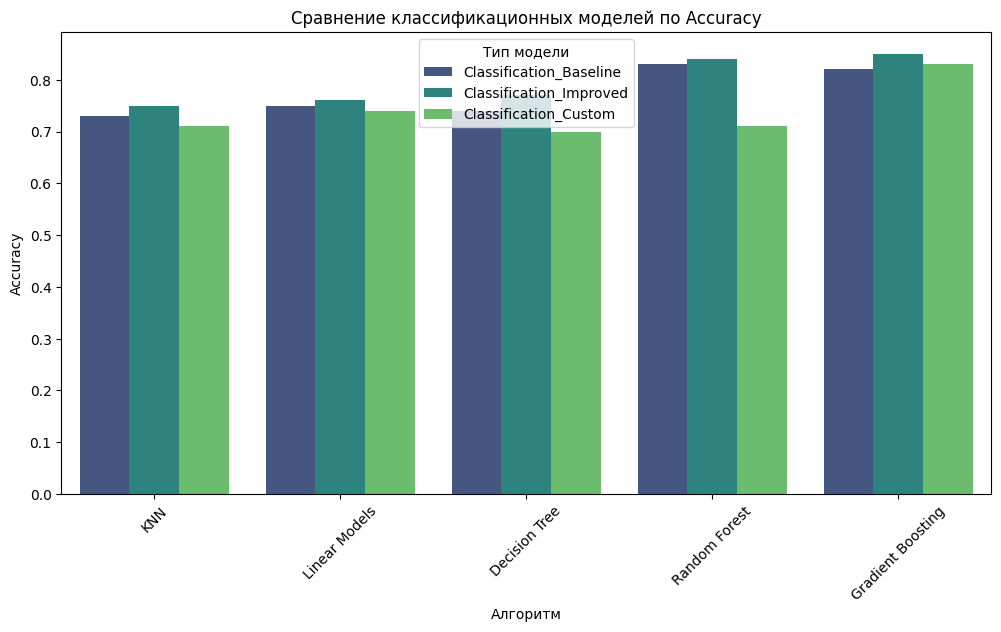

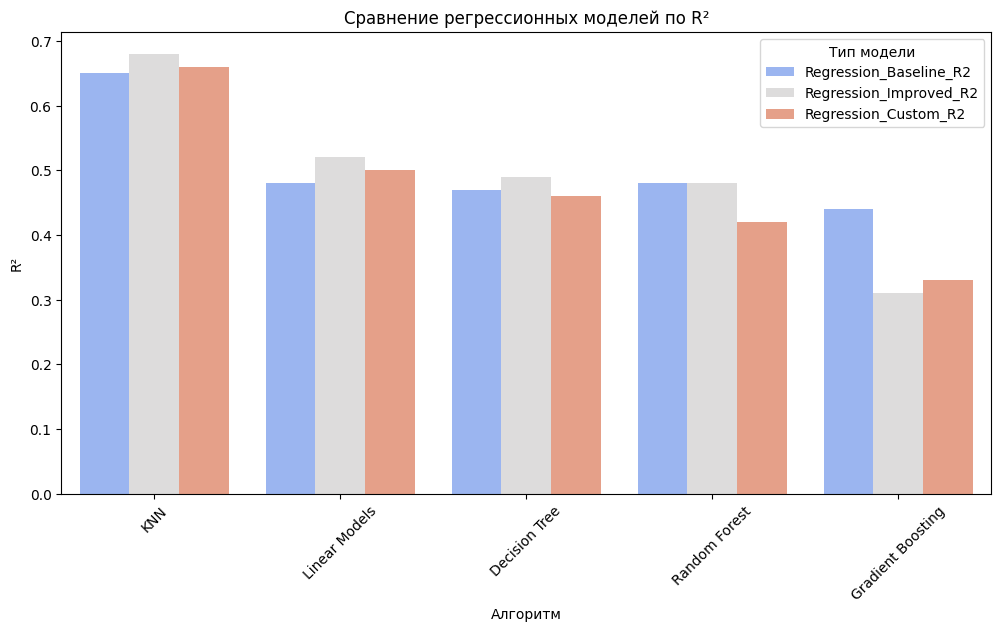

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Данные для сравнения (пример)
data = {
    "Algorithm": ["KNN", "Linear Models", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Classification_Baseline": [0.73, 0.75, 0.74, 0.83, 0.82],
    "Classification_Improved": [0.75, 0.76, 0.77, 0.84, 0.85],
    "Classification_Custom": [0.71, 0.74, 0.70, 0.71, 0.83],
    "Regression_Baseline_R2": [0.65, 0.48, 0.47, 0.48, 0.44],
    "Regression_Improved_R2": [0.68, 0.52, 0.49, 0.48, 0.31],
    "Regression_Custom_R2": [0.66, 0.50, 0.46, 0.42, 0.33],
}

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Визуализация для классификации
plt.figure(figsize=(12, 6))
sns.barplot(data=df.melt(id_vars="Algorithm",
                         value_vars=["Classification_Baseline", "Classification_Improved", "Classification_Custom"],
                         var_name="Type", value_name="Accuracy"),
            x="Algorithm", y="Accuracy", hue="Type", palette="viridis")
plt.title("Сравнение классификационных моделей по Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Алгоритм")
plt.legend(title="Тип модели")
plt.xticks(rotation=45)
plt.show()

# Визуализация для регрессии
plt.figure(figsize=(12, 6))
sns.barplot(data=df.melt(id_vars="Algorithm",
                         value_vars=["Regression_Baseline_R2", "Regression_Improved_R2", "Regression_Custom_R2"],
                         var_name="Type", value_name="R²"),
            x="Algorithm", y="R²", hue="Type", palette="coolwarm")
plt.title("Сравнение регрессионных моделей по R²")
plt.ylabel("R²")
plt.xlabel("Алгоритм")
plt.legend(title="Тип модели")
plt.xticks(rotation=45)
plt.show()

# Визуализация для MAE (пример, если нужно)
# Добавьте данные для MAE и создайте аналогичный график
